# BEBI5009 Homework 2

Student: Shao-Ting Chiu

Student ID: B03901045

Source Code on Github: https://github.com/stevengogogo/BEBI-5009-Mathematical-Biology

Reference: B. P.Ingalls, Mathematical Modelling in Systems Biology : An Introduction, vol. 53, no. 9. 2014.

## Problem 1- 2.4.8 Rapid Equilibrium Approximation

<img src="img/p2-4-8.png">

SOLUTION:

(a) Construct a differential equation model for the system.

$$\begin{align}
\frac{d[A]}{dt} &= -k_{1}[A] + k_{-1}[B]\\
\frac{d[B]}{dt} &= k_{1}[A] - (k_{-1}+k_{2})[B] + k_{-2}[C] \\
\frac{d[C]}{dt} &= k_{2}[B] - k_{-2}[C]\\
\end{align}$$

Then, simulation the system with the following initial conditions: $k_{1}=0.05, k_{2}=0.7, k_{-1}=0.005, and k_{-2}=0.4$. The following code defines the system of equations. 

In [1]:
def reaction(agent, t, k):
    """
    Define the differential equations for the network system.
    
    Arguments:
            agent: vector of the chemical concentrations:
                    agent = [a,b,c]
                k: vector of rate constants:
                    k = [k1, k2, kn1, kn2]
                t: time
    """
    # Assign parameters
    a, b, c = agent
    k1, k2, kn1, kn2 = k
   
    # Create dfdt = [a', b', c']
    dfdt = [
            -k1*a+kn1*b,
            k1*a-(kn1+k2)*b+kn2*c,
            k2*b-kn2*c
           ]
    
    return dfdt

Next, I used odeint to solve the above equations for a given set of parameter values, initial conditions, and time interval.

In [2]:
import numpy as np
from scipy.integrate import odeint

# Initial conditions and rate constants
a0, b0, c0 = 1.5, 3.0, 2.0
k1, k2, kn1, kn2 = 0.05, 0.7, 0.005, 0.4

# Pack up the initial condition and the parameters:
agent0 = [a0, b0, c0]
k = [k1, k2, kn1, kn2]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime_s, stoptime_l = 2.0, 60.0 # Short-term, long-term
numpoints = 1500

# Create time samples
ts = np.linspace(0, stoptime_s, numpoints)
tl = np.linspace(0, stoptime_l, numpoints)

# ODE solver
wsol_s = odeint(reaction, agent0, ts, args=(k,), atol=abserr, rtol=relerr)
wsol_l = odeint(reaction, agent0, tl, args=(k,), atol=abserr, rtol=relerr)

Plot the **transient** and **steady-state behavior** of the system.

Text(0,0.5,'Concentration (mM)')

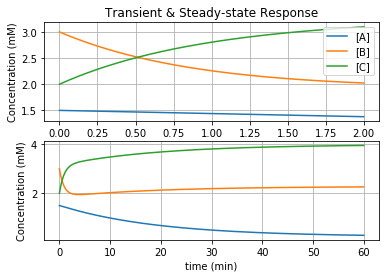

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

label = [r'[A]',r'[B]',r'[C]']

fig_trans = plt.figure()
plt.subplot(211)
for i in range(wsol_s.shape[1]):
    plt.plot(ts, wsol_s[:,i], label=label[i])

plt.legend()
plt.grid()
plt.title("Transient & Steady-state Response")
plt.ylabel('Concentration (mM)')

# Plot steady-state response
plt.subplot(212)
for i in range(wsol_l.shape[1]):
    plt.plot(tl, wsol_l[:,i], label=label[i])
plt.grid()
plt.xlabel('time (min)')
plt.ylabel('Concentration (mM)')

Because $k_{2} + k_{-2} = 1.1 >> k_{1} + k_{-1} = 0.055$, [A] and [B] changes faster than [C].

(b) Use a rapid equilibrium assumption to reduce the system to two differential equations (describing one of the original species and one combined species pool) and two algebraic equations.

SOLUTION:

1. Let $\tilde{d}$ be the total concentration in the pool of B and C (To say, $\tilde{d}(t) = \tilde{b}(t) + \tilde{c}(t)$). The relative  fractions of A and B in the pool are fixed by the equilibrium ratio. This allows us to write

$$\begin{align}
\tilde{b}(t) &= \frac{k_{-2}}{k_{2}+k_{-2}}\tilde{d}(t) \\
\tilde{c}(t) &= \frac{k_{2}}{k_{2}+k_{-2}}\tilde{d}(t) \\
\frac{d\tilde{d}(t)}{dt} &= \frac{d\tilde{b}(t)+d\tilde{c}(t)}{dt} \\
&= k_{1}[A]-k_{-1}\tilde{b}(t) \\
&= k_{1}[A]-k_{-1}\frac{k_{-2}}{k_{2}+k_{-2}}\tilde{b} \\
\end{align}$$

By using rapid equilibrium assumption, this system can be simplified to two differential equations. There are

$$\begin{align}
\frac{d[A]}{dt} &= -k_{1}[A] + k_{-1}[B] \\
&= -k_{1}[A] + k_{-1}\frac{k_{-2}}{k_{2}+k_{-2}}\tilde{b} \\
\frac{d\tilde{d}(t)}{dt} &= k_{1}[A]-k_{-1}\frac{k_{-2}}{k_{2}+k_{-2}}\tilde{b}
\end{align}$$

with initial condition $\tilde{d}(0)=\tilde{b}(0)+\tilde{c}(0)=3+2=5$

(c) Run a simulation of the reduced model in part (b) to compared with the simulation in part (a).

SOLUTION:

In [4]:
def rapid_reaction(agent, t, k):
    # Assign parameters
    a, d = agent
    k1, kn1 = k
   
    # Create dfdt = [a', d']
    dfdt = [
            -k1 * a + kn1 * (kn2 / (k2 + kn2)) * d,
            k1 * a - kn1 * (kn2 / (k2 + kn2)) * d
           ]
    
    return dfdt

In [5]:
# Assign parameters
a0, d0 = 1.5, 5.0
k1, kn1 = 0.05, 0.005

# Pack up the initial condition and the parameters:
agent0_r = [a0, d0]
k_r = [k1, kn1]

wsol_l_r = odeint(rapid_reaction, 
                agent0_r, 
                tl, 
                args=(k_r,), 
                atol=abserr, 
                rtol=relerr)

a = wsol_l_r[:,0]
b = wsol_l_r[:,1] * kn2 /(k2+kn2) 
c = wsol_l_r[:,1] * k2  /(k2+kn2) 

wsol_l_r_abc = [wsol_l_r[:,0], b, c]

Text(0,0.5,'Concentration (mM)')

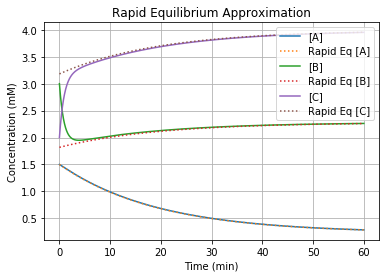

In [6]:
label = [r'[A]',r'[B]',r'[C]']

fig_rapid = plt.figure()
for i in range(wsol_l.shape[1]):
    plt.plot(tl, wsol_l[:,i], label=label[i])
    plt.plot(tl, wsol_l_r_abc[i], label='Rapid Eq '+label[i], linestyle=':')

plt.legend()
plt.grid()
plt.title("Rapid Equilibrium Approximation")
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')

In this plot, the dash lines represent the solutions based on rapid equilibrium assumption, and the solid lines are the control curves. According to this graph, rapid equilibrium assumption provides accurate prediction of steady-state concentrations. However, it is not the case during a short initial transient. 

## Problem 2- 2.4.9 Quasi-steady-state Approximation
<img src="img/p2-4-9.png" alt='Problem2-2-4-9'>

(a) Construct a differential equation model of the system.

SOLUTION:

1. Derive the differential equations

$$\begin{align}
\frac{d[A]}{dt} &= k_{0} - k_{2}[A] - k_{1}[A] + k_{-1}[B]\\
                &= k_{0} - (k_{2}+k_{1})[A] + k_{-1}[B]\\
\frac{d[B]}{dt} &= k_{1}[A] - k_{-1}[B] \\
\end{align}$$

2. Simulation

Text(0,0.5,'Concentration (mM)')

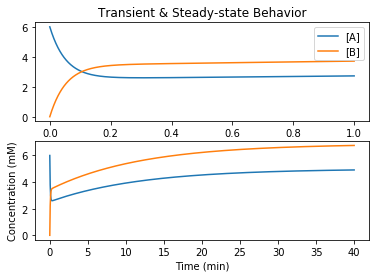

In [7]:
def reaction2(agent, t, k):
    a, b = agent
    k0, k1, k2, kn1 = k
    
    dfdt = [
            k0 - (k2 + k1) * a + kn1 * b,
            k1 * a - kn1 * b
        ]
    
    return dfdt

# Assign initial condition and parameters
a0, b0 = 6.0, 0.0
k0, k1, k2, kn1 = 1.0, 11.0, 0.2, 8.0

# Pack up
agent0 = [a0, b0]
k = [k0, k1, k2, kn1]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 1 # Short-term, long-term
stoptime2 = 40
numpoints = 1500
t = np.linspace(0, stoptime, numpoints)
t2 = np.linspace(0, stoptime2, numpoints)
# ODE Solver
wsol2 = odeint(reaction2, agent0, t, args=(k,), atol=abserr, rtol=relerr)
wsol2_2 = odeint(reaction2, agent0, t2, args=(k,), atol=abserr, rtol=relerr)

# Plot
fig_reaction2 = plt.figure()
label = [r'[A]', r'[B]']

# Transient Response
plt.subplot(211)
plt.title('Transient & Steady-state Behavior')

for i in range(wsol2.shape[1]):
    plt.plot(t, wsol2[:,i], label=label[i])

plt.legend()

# Steady-state response
plt.subplot(212)
for i in range(wsol2_2.shape[1]):
    plt.plot(t2, wsol2_2[:,i], label=label[i])
    
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')

(b) Use a quasi-steady-state assumption to reduce the system by replaction a differential equation with an algebraic equation.

SOLUTION:

* Because $k_{1} + k_{-1} = 19 >> k_{2}$, to introduce quasi-steady state assumption, I set $\tilde{a}(t) = a^{qss}(t)$, and specify that $a^{qss}$ keeps up with the transtions in any slower variables. For each time constant, $a^{qss}$ satisfies 

$$ 0 = k_{0} - (k_{2} + k_{1})a^{qss} + k_{-1}b(t) $$

    or equivalently,

$$a^{qss} = \frac{k_{0}+k_{-1}b(t)}{k_{1}+k_{2}}$$

$$\begin{align}
\frac{d}{dt}b(t) &= k_{1}a^{qss} - k_{-1}b(t) \\
                 &= k_{1}\frac{k_{0}+k_{-1}b(t)}{k_{1}+k_{2}}-k_{-1}b(t)\\
                 &= \frac{k_{0}k_{1}}{k_{1}+k_{2}}-\frac{k_{-1}k_{2}}{k_{1}+k_{2}}b(t)
\end{align}$$

* $A_{0} + B_{0} = a^{qss} + b_{0}$

$$\begin{align}
b_{0} &= A_{0} + B_{0} - a^{qss} \\
      &= A_{0} + B_{0} - \frac{k_{0}+k_{-1}b_{0}}{k_{1}+k_{2}} \\
b_{0} &= \frac{(A_{0}+B_{0})(k_{1} + k_{2})-k_{0}}{k_{-1}+k_{1}+k_{2}} \\
\end{align}$$

* Simulation

Text(0.5,1,'QSSA on A')

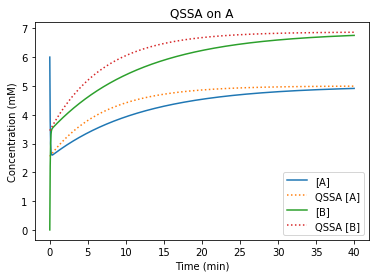

In [11]:
def reaction2QSSA(agent, t, k):
    """
    QSSA differential equation
    """
    a, b = agent
    k0, k1, k2, kn1 = k
    
    # dfdt = [a', b']
    dfdt = [
        0,
        (k0 * k1) / (k1+k2) - (kn1*k2 / (k1 + k2)) * b
    ]
    
    return dfdt


k0, k1, k2, kn1 = 1.0, 11, 0.2, 8
a0, b0 = 6.0, 0.0

b0qss = ( (a0 + b0)*(k1 + k2)-k0 )/(kn1+k1+k2)
a0qss = a0 + b0 - b0qss

k = [k0, k1, k2, kn1]
agent0 = [a0qss, b0qss]


# ODE solver
t = np.linspace(0, 40, 1500)
wsol2QSSA = odeint(reaction2QSSA, agent0, t, args=(k,), atol=abserr, rtol=relerr)

# Calculate a^qss
a = (k0 + kn1*wsol2QSSA[:,1])/ (k1 + k2)
b = wsol2QSSA[:,1]
wsol2QSSA = [a, b]

# Plot
label = [r'[A]', r'[B]']
fig_QSSA = plt.figure()

for i in range(0,2):
    plt.plot(t, wsol2_2[:,i], label = label[i] )
    plt.plot(t, wsol2QSSA[i], label = 'QSSA ' + label[i], linestyle=":")

plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('Concentration (mM)')
plt.title('QSSA on A')

In [9]:
# Check Initial Value of above model
print('\tA0+B0= ',a0+b0, '\n', '\ta0+b0=', a[0]+b[0] )

	A0+B0=  6.0 
 	a0+b0= 5.999999999999999


* Conclusions
1. QSSA on A can not accurately estimate the full model
2. In comparison QSSA on B has better estimation
3. This phenomenon is due to B is relatively more steady than A (k1~=kn1)